This project aims to extract features from raw audio using the Deezer API Dataset.

In [1]:
from helpers.extractor import *
from helpers.deezer_tools import *
from helpers.neural_network import *

loader = DeezerLoader(fixed_size=128*128+10, 
                      sample_size=1/32, 
                      local=True, 
                      limit_track=15781392, 
                      limit_genres=[113, 152], 
                      other_genres_rate=0,
                      LABELS_COUNT = 10,
                      #rating_labels=True
                     )
loader.shuffle_rate = 1
#loader.picker.FixAllTracks()

print(len(loader.picker.tracks))
print("tracks with genre 113: "+str(len(loader.picker.tracksByGenre[113])))

network = ConvNet(loader, 
                  training_iters=10000, 
                  display_step=2, 
                  learning_rate = 0.001, 
                  batch_size=128, 
                  n_steps=128,)
print(network.n_input)
print(network.n_classes)

layers = []
layers.append(LSTMOperation(cells=[512, 128, 32], n_classes=network.n_classes))

x=tf.placeholder("float", [None, 128, 128])

network.Run(layers, x=x, save_path="graphs/DeezerGraph", input_as_label=True)


745
tracks with genre 113: 398
128
2
x: (?, 128, 128)
y: (?, 2)
LSTM_0: [512, 128, 32] => (?, 2)


C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


extracted 128 samples from 128 tracks (matches: 128)


ValueError: Cannot feed value of shape (128, 126, 128) for Tensor 'Placeholder:0', which has shape '(?, 128, 128)'

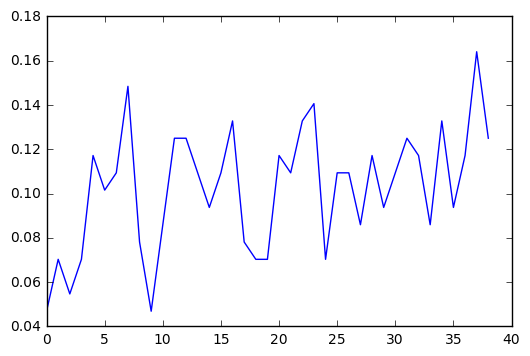

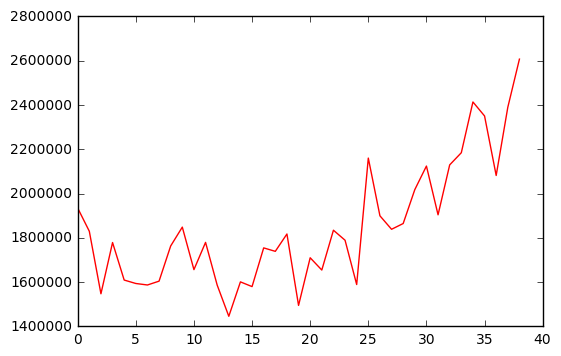

In [2]:
network.Plot()

In [1]:
from helpers.extractor import *
from helpers.deezer_tools import *
from helpers.neural_network import *

loader = DeezerLoader(fixed_size=32*32, 
                      #extract_length = 2,
                      sample_size=1/16, 
                      local=True, 
                      #limit_track=15781392, 
                      limit_genres=[113, 152], 
                      other_genres_rate=0, 
                      #rating_labels=True,
                      #label_is_input = True,
                      #encoding="OneHot",
                      LABELS_COUNT = 2,
                      #insert_global_input_state = True,
                      )

loader.shuffle_rate = 1
#loader.picker.FixAllTracks()

network = ConvNet(loader, 
                  n_steps=32,
                  training_iters=10000, 
                  display_step=1, 
                  learning_rate = 0.0001, 
                  batch_size=64)
print(network.n_input)
print(network.n_classes)

x=tf.placeholder("float", [None, 32, 32])

layers = []
layers.append(NNOperation("reshape", [-1, 32, 32, 1]))
layers.append(NNOperation("conv2d", [3, 3, 1, 32]))
layers.append(NNOperation("maxpool2d", 2)) #16
layers.append(NNOperation("conv2d", [3, 3, 32, 64]))
layers.append(NNOperation("maxpool2d", 2)) #8
layers.append(NNOperation("conv2d", [3, 3, 64, 128]))
layers.append(NNOperation("maxpool2d", 2)) #4
layers.append(NNOperation("conv2d", [3, 3, 128, 256]))
layers.append(NNOperation("maxpool2d", 2)) #2
layers.append(NNOperation("reshape", [-1, 2*256, 2]))
layers.append(LSTMOperation(cells=[1024], n_classes=network.n_classes))

network.Run(layers=layers, x=x, save_path="graphs/DeezerLSTMGraph")

32
2
x: (?, 32, 32)
y: (?, 2)
reshape_0: (?, 32, 32, 1)
conv2d_0: (?, 32, 32, 32)
maxpool2d_0: (?, 16, 16, 32)
conv2d_0: (?, 16, 16, 64)
maxpool2d_0: (?, 8, 8, 64)
conv2d_0: (?, 8, 8, 128)
maxpool2d_0: (?, 4, 4, 128)
conv2d_0: (?, 4, 4, 256)
maxpool2d_0: (?, 2, 2, 256)
reshape_0: (?, 512, 2)
LSTM_0: [1024] => (?, 2)


C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


extracted 64 samples from 64 tracks (matches: 64)
Iter 64, Minibatch Loss= 5.219911, Training Accuracy= 0.50000
extracted 64 samples from 64 tracks (matches: 64)
Iter 128, Minibatch Loss= 5.034247, Training Accuracy= 0.54688
extracted 64 samples from 64 tracks (matches: 64)
Iter 192, Minibatch Loss= 4.510892, Training Accuracy= 0.50000
extracted 64 samples from 64 tracks (matches: 64)
Iter 256, Minibatch Loss= 5.765565, Training Accuracy= 0.43750
extracted 64 samples from 64 tracks (matches: 64)
Iter 320, Minibatch Loss= 2.965644, Training Accuracy= 0.68750
extracted 64 samples from 64 tracks (matches: 64)
Iter 384, Minibatch Loss= 4.868852, Training Accuracy= 0.43750
extracted 64 samples from 64 tracks (matches: 64)
Iter 448, Minibatch Loss= 5.346450, Training Accuracy= 0.57812
extracted 64 samples from 64 tracks (matches: 64)
Iter 512, Minibatch Loss= 4.136124, Training Accuracy= 0.54688
extracted 64 samples from 64 tracks (matches: 64)
Iter 576, Minibatch Loss= 5.811702, Training Ac

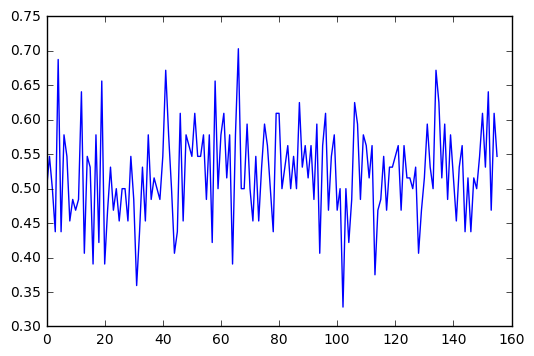

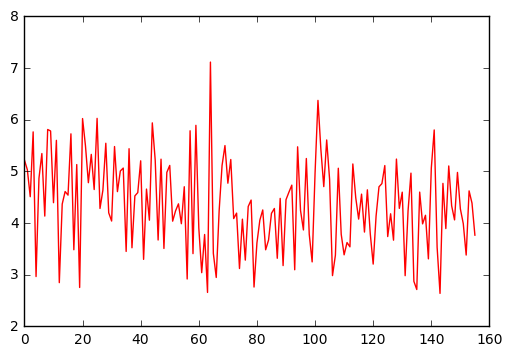

In [2]:
network.Plot()